# MH of older workers, retirement age and working conditions

# Final datasets

Load libraries

In [1]:
import os
import sys

src_path = os.path.abspath("../")
sys.path.append(src_path)

from utils.common import *
from utils.ewcs import *
from utils.retirement import *
from utils.share import *

import_libraries()

Merge final SHARE and EWCS data to create different datasets

In [2]:
# 3 digits waves 4,5,6 merge on year and country
merge_share_ewcs("3digits_w456_year_country.csv", convert_to_3_digits=True)
# 3 digits waves 4,5,6 common merge on year and country
merge_share_ewcs(
    "3digits_w456_year_country_balanced.csv", convert_to_3_digits=True, balanced=True
)
# 3 digits waves 4,6 merge on year and country
merge_share_ewcs(
    "3digits_w46_year_country.csv", convert_to_3_digits=True, exclude_wave_5=True
)
# 3 digits waves 4,6 common merge on year and country
merge_share_ewcs(
    "3digits_w46_year_country_balanced.csv",
    convert_to_3_digits=True,
    balanced=True,
    exclude_wave_5=True,
)

# 3 digits waves 4,5,6 merge on year
merge_share_ewcs(
    "3digits_w456_year.csv", convert_to_3_digits=True, not_country_wise=True
)
# 3 digits waves 4,5,6 common merge on year
merge_share_ewcs(
    "3digits_w456_year_balanced.csv",
    convert_to_3_digits=True,
    balanced=True,
    not_country_wise=True,
)
# 3 digits waves 4,6 merge on year
merge_share_ewcs(
    "3digits_w46_year.csv",
    convert_to_3_digits=True,
    exclude_wave_5=True,
    not_country_wise=True,
)
# 3 digits waves 4,6 common merge on year
merge_share_ewcs(
    "3digits_w46_year_balanced.csv",
    convert_to_3_digits=True,
    balanced=True,
    exclude_wave_5=True,
    not_country_wise=True,
)

# 4 digits waves 4,5,6 merge on year and country
merge_share_ewcs("4digits_w456_year_country.csv")
# 4 digits waves 4,5,6 common merge on year and country
merge_share_ewcs("4digits_w456_year_country_balanced.csv", balanced=True)
# 4 digits waves 4,6 merge on year and country
merge_share_ewcs("4digits_w46_year_country.csv", exclude_wave_5=True)
# 4 digits waves 4,6 common merge on year and country
merge_share_ewcs(
    "4digits_w46_year_country_balanced.csv", balanced=True, exclude_wave_5=True
)

# 4 digits waves 4,5,6 merge on year
merge_share_ewcs("4digits_w456_year.csv", not_country_wise=True)
# 4 digits waves 4,5,6 common merge on year
merge_share_ewcs("4digits_w456_year_balanced.csv", balanced=True, not_country_wise=True)
# 4 digits waves 4,6 merge on year
merge_share_ewcs("4digits_w46_year.csv", exclude_wave_5=True, not_country_wise=True)
# 4 digits waves 4,6 common merge on year
merge_share_ewcs(
    "4digits_w46_year_balanced.csv",
    balanced=True,
    exclude_wave_5=True,
    not_country_wise=True,
)

In [3]:
folder_path = (
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/"
)
files = os.listdir(folder_path)

for file in files:
    if file.startswith("3digits") or file.startswith("4digits"):
        file_path = os.path.join(folder_path, file)
        data = pd.read_csv(file_path)  # Read the CSV file
        unique_values = data[
            "mergeid"
        ].nunique()  # Count unique values in the 'mergeid' column
        print(f"{file[:-4]} : {unique_values} unique ids")

3digits_w456_year_country_balanced : 1224 unique ids
4digits_w456_year_country_balanced : 836 unique ids
4digits_w46_year_country : 1949 unique ids
4digits_w456_year_country : 1979 unique ids
3digits_w46_year_country : 2323 unique ids
3digits_w456_year_balanced : 1521 unique ids
4digits_w46_year_country_balanced : 860 unique ids
4digits_w46_year_balanced : 1526 unique ids
4digits_w46_year : 2511 unique ids
4digits_w456_year : 2567 unique ids
3digits_w46_year_country_balanced : 1269 unique ids
3digits_w456_year_country : 2373 unique ids
3digits_w456_year : 2613 unique ids
3digits_w46_year_balanced : 1590 unique ids
4digits_w456_year_balanced : 1380 unique ids
3digits_w46_year : 2547 unique ids


In [4]:
df = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/4digits_w46_year_balanced.csv"
)

In [5]:
df.groupby("mergeid").wave.nunique().to_frame().value_counts()

wave
2       1526
Name: count, dtype: int64

Number of unique IDs: 1526
Number of unique IDs by country:
country
Austria           145
Belgium           266
Czech Republic    150
Denmark           115
Estonia           356
France            181
Italy             107
Slovenia           91
Spain             115
Name: mergeid, dtype: int64
Number of unique IDs by year:
year
2011    1526
2015    1526
Name: mergeid, dtype: int64

Demographics:
           age   gender  nb_children  yrseducation
count  3052.00  3052.00      3052.00       3052.00
mean     55.61     0.58         1.91         13.08
std       3.04     0.49         1.29          3.97
min      50.00     0.00         0.00          0.00
25%      53.00     0.00         1.00         11.00
50%      56.00     1.00         2.00         13.00
75%      58.00     1.00         3.00         16.00
max      64.00     1.00        10.00         36.00


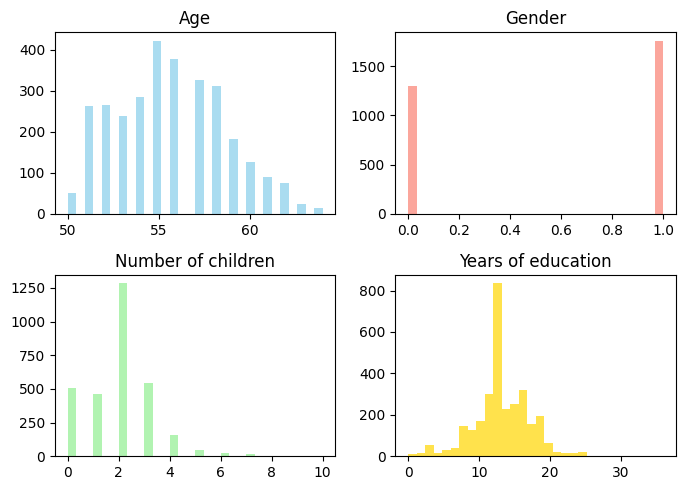


Job Status:
job_status
Employee                   0.36
Private sector employee    0.26
Public sector employee     0.18
Self-employed              0.12
Civil servant              0.09
Name: proportion, dtype: float64

Industry of Employment:
industry
Education                                       0.14
Health and social work                          0.13
Other community                                 0.13
Manufacturing                                   0.12
Wholesale and retail trade                      0.11
Public administration and defence               0.10
Transport, storage and communication            0.06
Construction                                    0.06
Agriculture, hunting, forestry, fishing         0.05
Financial intermediation                        0.03
Hotels and restaurants                          0.03
Real estate, renting and business activities    0.02
Electricity, gas and water supply               0.02
Mining and quarrying                            0.01
Name: p

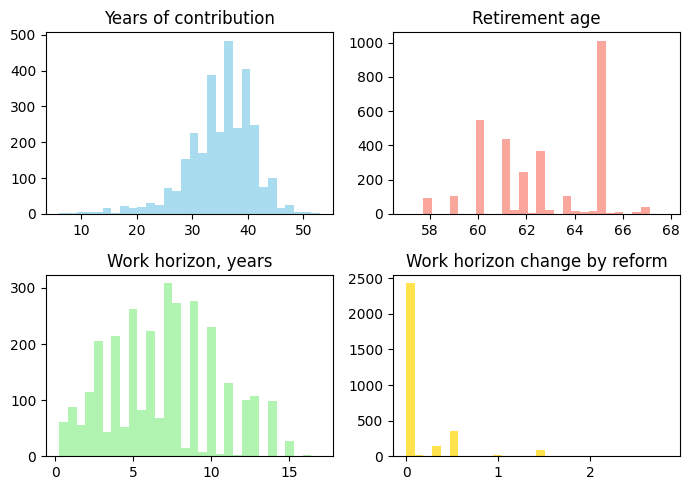


Physical Health and Chronic Diseases:
sphus2  chronic2
0       0           0.40
1       0           0.31
0       1           0.23
1       1           0.06
Name: proportion, dtype: float64

Mental Health:
eurodcat
0    0.81
1    0.19
Name: proportion, dtype: float64
EuroD scale score:
eurod
0.0     767
1.0     710
2.0     587
3.0     394
4.0     276
5.0     160
6.0      81
7.0      45
8.0      15
9.0      10
10.0      5
12.0      2
Name: count, dtype: int64


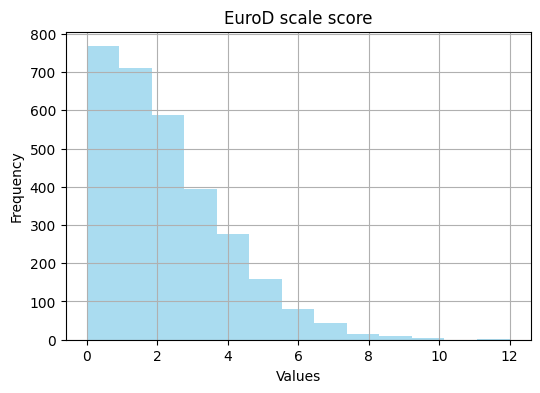


Working Conditions:
       jqi_monthly_earnings_pure  jqi_skills_discretion_pure  \
count                    3052.00                     3052.00   
mean                     1565.68                       59.18   
std                       505.61                       14.07   
min                       307.61                        5.41   
25%                      1244.68                       48.48   
50%                      1486.79                       58.69   
75%                      1814.40                       71.24   
max                      4320.87                       91.23   

       jqi_social_environment_pure  jqi_physical_environment_pure  \
count                      3052.00                        3052.00   
mean                         80.57                          84.26   
std                           4.98                           8.79   
min                          40.91                          28.21   
25%                          78.26                       

In [6]:
describe_data(df)